In [3]:
import numpy as np
import pandas as pd

In [4]:
df = pd.read_csv("./Dataset/spam.csv", encoding='latin1')

In [5]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


## DATA CLEANING

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [9]:
df.sample(5)

,v1,v2
176,ham,U still going to the mall?
1114,ham,No no:)this is kallis home ground.amla home to...
2982,ham,What should i eat fo lunch senor
2696,ham,Nope but i'm going home now then go pump petro...
4468,ham,"Nothing, smsing u n xy lor. Sorry lor da guys ..."


In [10]:
df.rename(columns={'v1': 'target', 'v2': 'text'}, inplace=True)

In [11]:
df.sample(5)

,target,text
1874,spam,Would you like to see my XXX pics they are so ...
2081,ham,I'm aight. Wat's happening on your side.
4439,ham,I've got it down to a tea. not sure which flavour
5207,ham,"Babe, I'm answering you, can't you see me ? Ma..."
1638,ham,Great comedy..cant stop laughing da:)


In [12]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [13]:
df['target'] = encoder.fit_transform(df['target']) # changing ham to 0 and spam to 1

In [14]:
df.sample(5)

,target,text
4670,0,"Probably not, I'm almost out of gas and I get ..."
1918,0,Is fujitsu s series lifebook good?
1710,0,"(No promises on when though, haven't even gott..."
1722,0,Thought praps you meant another one. Goodo! I'...
2089,0,No i'm not. I can't give you everything you wa...


In [15]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [16]:
# duplicated
df.duplicated().sum()

np.int64(403)

In [17]:
df = df.drop_duplicates(keep="first")

In [18]:
df.duplicated().sum()

np.int64(0)

In [19]:
df.shape

(5169, 2)

## 2. EDA

In [20]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

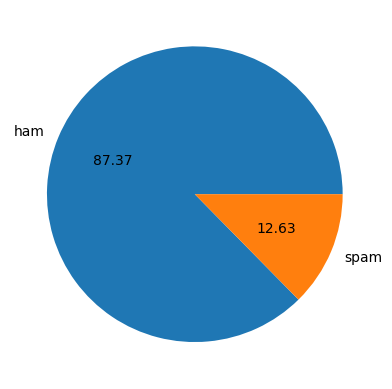

In [21]:
import matplotlib.pyplot as plt

plt.pie(df['target'].value_counts(), labels=['ham', 'spam'], autopct="%0.2f")
plt.show()

In [22]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\aliha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [23]:
df['num_chars'] = df['text'].apply(len)

In [24]:
df.head()

,target,text,num_chars
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [25]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\aliha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\aliha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [26]:
df['nums_word']= df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [27]:
df['nums_sent']= df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [28]:
df.head()

,target,text,num_chars,nums_word,nums_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [29]:
df[['num_chars', 'nums_word', 'nums_sent']].describe()

,num_chars,nums_word,nums_sent
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [30]:
df[df['target'] == 0][['num_chars','nums_word', 'nums_sent']].describe()

,num_chars,nums_word,nums_sent
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [31]:
df[df['target'] == 1][['num_chars','nums_word', 'nums_sent']].describe()

,num_chars,nums_word,nums_sent
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='num_chars', ylabel='Count'>

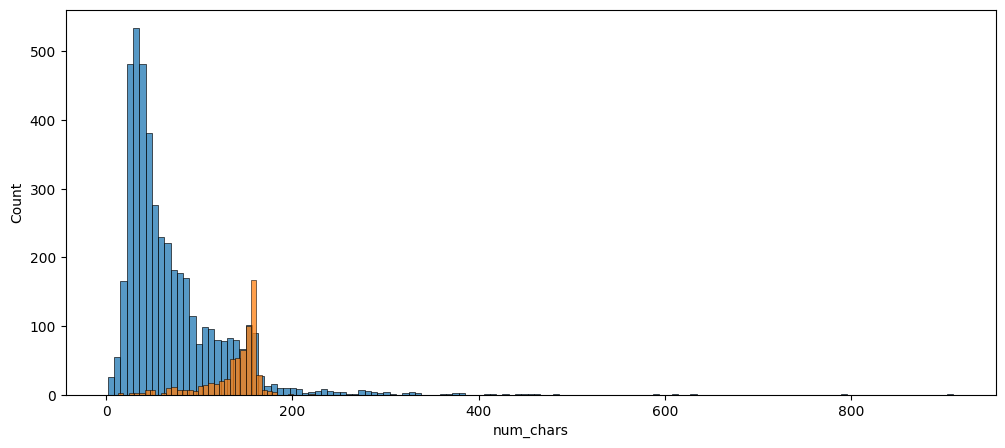

In [32]:
import seaborn as sns
plt.figure(figsize=(12,5))
sns.histplot(df[df['target'] ==0]['num_chars'])
sns.histplot(df[df['target'] ==1]['num_chars'])

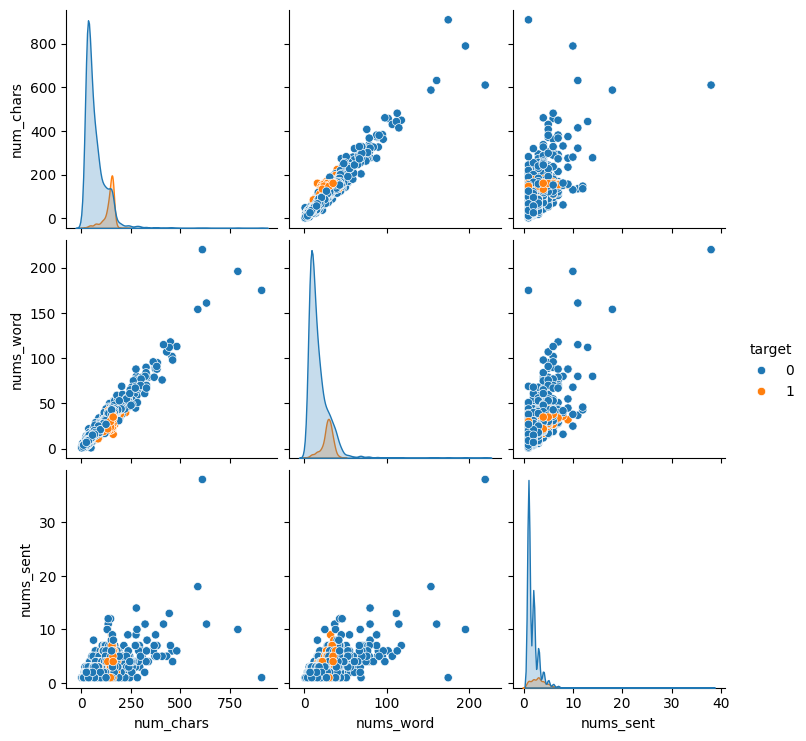

In [33]:
sns.pairplot(df, hue='target')

<Axes: >

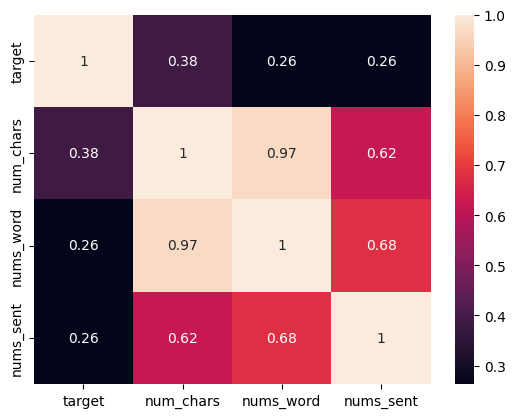

In [34]:
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True)

### DATA PREPROCESSING
- Lower case
- tokenization
- remove special chars
- remove stop words and puntuations
- stemming

In [35]:
import string
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aliha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [36]:
from nltk.stem.porter import PorterStemmer


In [37]:
def transform_text(text):
    text = text.lower() # lower
    text = nltk.word_tokenize(text) # tokenize
    
    y = []
    for i in text: # remove special chars
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words("english") and i not in string.punctuation:
            y.append(i)
    
    text = y[:]
    y.clear()
    ps = PorterStemmer()
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)
    

In [38]:
transform_text("hello how are you %% ? are you good hassam dancing")

'hello good hassam danc'

In [39]:
df['trans_text'] = df['text'].apply(transform_text)

In [40]:
df.head()

,target,text,num_chars,nums_word,nums_sent,trans_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [41]:
%pip install wordcloud

from wordcloud import WordCloud


Note: you may need to restart the kernel to use updated packages.


In [42]:
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

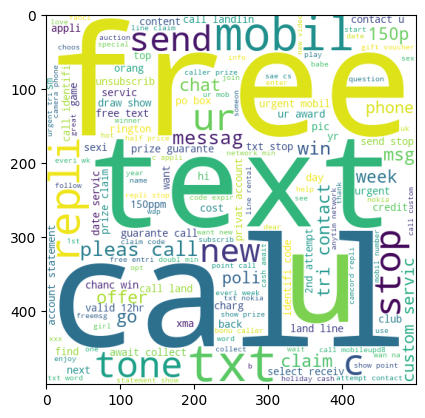

In [43]:
spam_wc = wc.generate(df[df['target']==1]['trans_text'].str.cat(sep=" "))
plt.imshow(spam_wc)

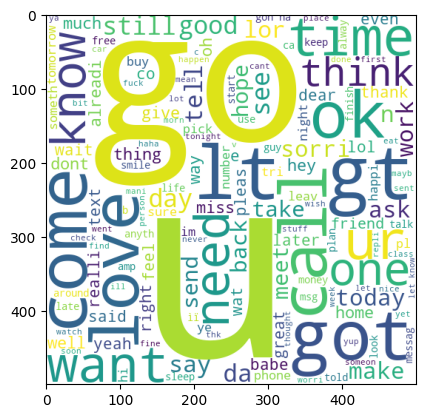

In [44]:
ham_wc = wc.generate(df[df['target']==0]['trans_text'].str.cat(sep=" "))
plt.imshow(ham_wc)

In [45]:
spam_corpus = []
for msg in df[df['target'] == 1]['trans_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

spam_corpus

['free',
 'entri',
 '2',
 'wkli',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkt',
 '21st',
 'may',
 'text',
 'fa',
 '87121',
 'receiv',
 'entri',
 'question',
 'std',
 'txt',
 'rate',
 'c',
 'appli',
 '08452810075over18',
 'freemsg',
 'hey',
 'darl',
 '3',
 'week',
 'word',
 'back',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chg',
 'send',
 'rcv',
 'winner',
 'valu',
 'network',
 'custom',
 'select',
 'receivea',
 'prize',
 'reward',
 'claim',
 'call',
 'claim',
 'code',
 'kl341',
 'valid',
 '12',
 'hour',
 'mobil',
 '11',
 'month',
 'u',
 'r',
 'entitl',
 'updat',
 'latest',
 'colour',
 'mobil',
 'camera',
 'free',
 'call',
 'mobil',
 'updat',
 'co',
 'free',
 '08002986030',
 'six',
 'chanc',
 'win',
 'cash',
 '100',
 'pound',
 'txt',
 'csh11',
 'send',
 'cost',
 '6day',
 'tsandc',
 'appli',
 'repli',
 'hl',
 '4',
 'info',
 'urgent',
 '1',
 'week',
 'free',
 'membership',
 'prize',
 'jackpot',
 'txt',
 'word',
 'claim',
 '81010',
 'c',
 'lccltd',
 'pobox',
 '4403ldnw

In [46]:
ham_corpus = []
for msg in df[df['target'] == 0]['trans_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [47]:
from collections import Counter

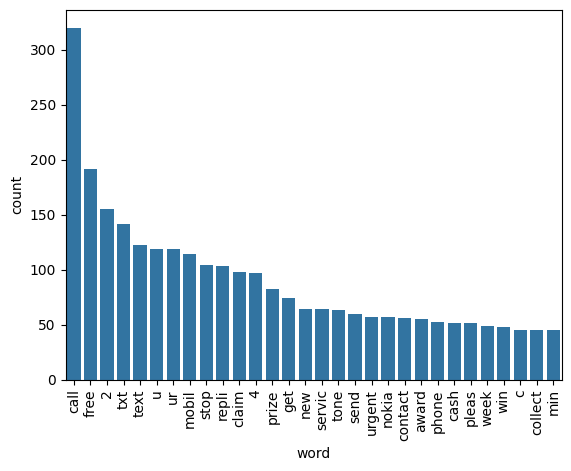

In [48]:
top_words_df = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['word', 'count'])
sns.barplot(x='word', y='count', data=top_words_df)
plt.xticks(rotation=90)
plt.show()

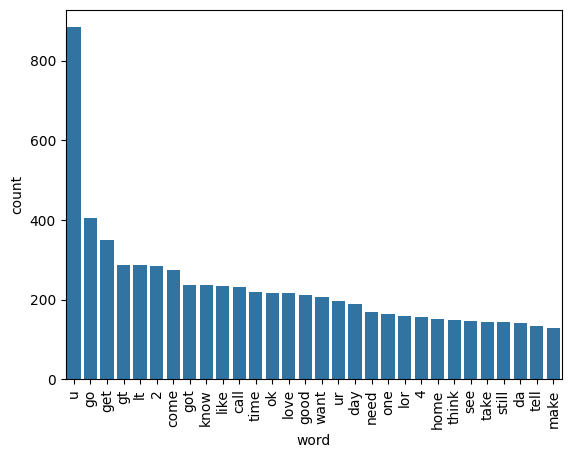

In [49]:
top_words_df_ham = pd.DataFrame(Counter(ham_corpus).most_common(30), columns=['word', 'count'])
sns.barplot(x='word', y='count', data=top_words_df_ham)
plt.xticks(rotation=90)
plt.show()

In [50]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tf = TfidfVectorizer()

In [51]:
X = cv.fit_transform(df['trans_text']).toarray()
Xt = tf.fit_transform(df['trans_text']).toarray()

In [52]:
y = df['target'].values

In [53]:
y

array([0, 0, 1, ..., 0, 0, 0], shape=(5169,))

In [54]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(5169, 6708))

In [55]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=2)
Xt_train, Xt_test, y_train, y_test = train_test_split(Xt,y, test_size=0.2, random_state=2)


In [56]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [57]:
gnb = GaussianNB()
bnb = BernoulliNB()
mnb = MultinomialNB()

In [58]:
gnb.fit(X_test, y_test)
y_pred1 = gnb.predict(X_test)
print("CountVectorizer: ")
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))
print("TfidfVectorizer: ")
gnb.fit(Xt_test, y_test)
y_pred1t = gnb.predict(Xt_test)
print(accuracy_score(y_test, y_pred1t))
print(confusion_matrix(y_test, y_pred1t))
print(precision_score(y_test, y_pred1t))

CountVectorizer: 
0.9729206963249516
[[868  28]
 [  0 138]]
0.8313253012048193
TfidfVectorizer: 
0.9729206963249516
[[868  28]
 [  0 138]]
0.8313253012048193


In [59]:
bnb.fit(X_test, y_test)
y_pred2 = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))
print("TfidfVectorizer")
bnb.fit(Xt_test, y_test)
y_pred2 = bnb.predict(Xt_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.8820116054158608
[[896   0]
 [122  16]]
1.0
TfidfVectorizer
0.8820116054158608
[[896   0]
 [122  16]]
1.0


In [60]:
mnb.fit(X_test, y_test)
y_pred3 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

mnb.fit(Xt_test, y_test)
y_pred3 = mnb.predict(Xt_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.9941972920696325
[[895   1]
 [  5 133]]
0.9925373134328358
0.9226305609284333
[[896   0]
 [ 80  58]]
1.0


In [61]:
%pip install xgboost

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier


Note: you may need to restart the kernel to use updated packages.


In [62]:
svc = SVC(kernel = 'sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbc = GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimator=50, random_state=2)
lrc = LogisticRegression(solver='liblinear', penalty='l1')


In [63]:
clfs={
    'SVC' : svc,
    'KN' : knc,
    'NB' : mnb,
    'DT' : dtc,
    'LR' : lrc,
    'RF' : rfc,
    'AdaBoost' : abc,
    'BgC' : bc,
    'ETC' : etc,
    'GDBT' : gbc,
    'XGB' : xgb
 }

In [70]:
from sklearn.metrics import f1_score, recall_score

In [74]:
def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)   
    return accuracy, precision, recall, f1

In [65]:
train_classifier(svc, Xt_train, y_train, Xt_test, y_test)

(0.9729206963249516, 0.9741379310344828)

In [76]:
accuracies = []
precisions = []
f1s = []
recalls = []

for name, clf in clfs.items():
    current_accuracy, current_precision, f1, recall = train_classifier(clf, Xt_train, y_train, Xt_test, y_test)
    
    print("For ", name)
    print("Accuracy: ", current_accuracy)
    print("Precision: ", current_precision)
    print("F1 score: ", f1)
    print("Recall: ", recall)
    accuracies.append(current_accuracy)
    precisions.append(current_precision)
    f1s.append(f1)
    recalls.append(recall)
    

For  SVC
Accuracy:  0.9729206963249516
Precision:  0.9741379310344828
F1 score:  0.8188405797101449
Recall:  0.889763779527559
For  KN
Accuracy:  0.9003868471953579
Precision:  1.0
F1 score:  0.2536231884057971
Recall:  0.4046242774566474
For  NB
Accuracy:  0.9593810444874274
Precision:  1.0
F1 score:  0.6956521739130435
Recall:  0.8205128205128205
For  DT
Accuracy:  0.9352030947775629
Precision:  0.8380952380952381
F1 score:  0.6376811594202898
Recall:  0.7242798353909465
For  LR
Accuracy:  0.9516441005802708
Precision:  0.94
F1 score:  0.6811594202898551
Recall:  0.7899159663865546
For  RF
Accuracy:  0.971953578336557
Precision:  1.0
F1 score:  0.7898550724637681
Recall:  0.8825910931174089
For  AdaBoost
Accuracy:  0.9245647969052224
Precision:  0.8409090909090909
F1 score:  0.5362318840579711
Recall:  0.6548672566371682
For  BgC
Accuracy:  0.9584139264990329
Precision:  0.8625954198473282
F1 score:  0.8188405797101449
Recall:  0.8401486988847584
For  ETC
Accuracy:  0.972920696324951

c:\Users\aliha\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:32:48] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "n_estimator" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


For  XGB
Accuracy:  0.9729206963249516
Precision:  0.9296875
F1 score:  0.8623188405797102
Recall:  0.8947368421052632


In [67]:
performance_df = pd.DataFrame({
	'Algorithm': list(clfs.keys()),
	'Accuracy': accuracies,
	'Precision': precisions
})

In [68]:
performance_df

,Algorithm,Accuracy,Precision
0,SVC,0.972921,0.974138
1,KN,0.900387,1.000000
2,NB,0.959381,1.000000
3,DT,0.937137,0.854369
4,LR,0.951644,0.940000
5,RF,0.971954,1.000000
6,AdaBoost,0.924565,0.840909
7,BgC,0.958414,0.862595
8,ETC,0.972921,0.982456
9,GDBT,0.952611,0.923810


In [77]:
chosen_accuracy, chosen_precision, f1, recall = train_classifier(xgb, Xt_train, y_train, Xt_test, y_test)

print("Model: XGBoost")
print("Accuracy: ", chosen_accuracy)
print("Precision: ", chosen_precision)
print("F1 Score: ", f1)
print("Recall: ", recall)

c:\Users\aliha\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:42:48] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "n_estimator" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Model: XGBoost
Accuracy:  0.9729206963249516
Precision:  0.9296875
F1 Score:  0.8623188405797102
Recall:  0.8947368421052632
